# Objective

* Predict whether the student( Applicant ) class will be Reject ( Bad ) or Approved ( Good )


In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [4]:
import pandas as pd
students= pd.read_csv (r"C:\Users\Clint Dmello\Desktop\michelle\logistics regreesion\xAPI-Edu-Data.csv")
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#### 2.2. Identifying & Treatment Missing Value

In [6]:
# count the number of NaN values in each column
students.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
Bank.head()

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No


#### Replacing Missing value by Mode

In [7]:
Bank.Married.value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [8]:
for column in ['Married','Gender','Self_Employed']:
    Bank[column].fillna(Bank[column].mode()[0], inplace=True)

In [9]:
Bank.Married.value_counts(dropna=False)

Yes    634
No     347
Name: Married, dtype: int64

In [10]:
# count the number of NaN values in each column
print(Bank.isnull().sum())

Loan_ID                0
Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64


In [7]:
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<AxesSubplot:>

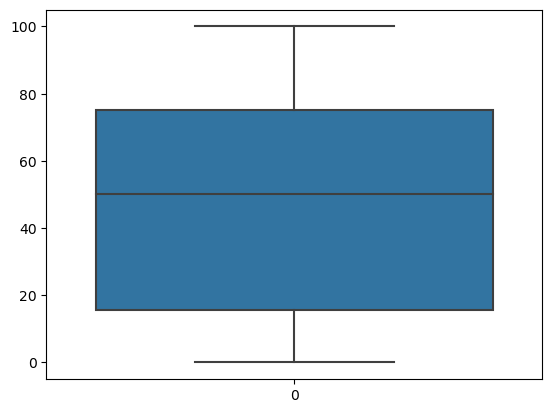

In [13]:
sns.boxplot(data=students.raisedhands)

<AxesSubplot:>

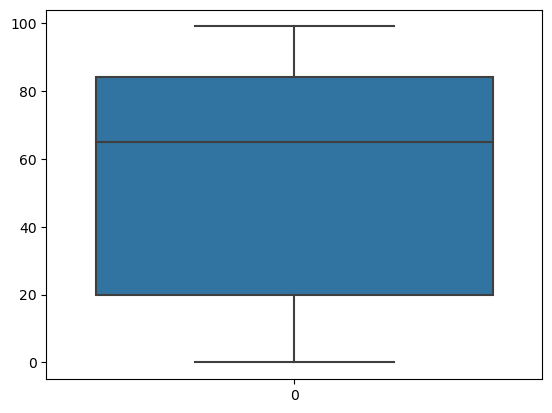

In [14]:
sns.boxplot(data=students.VisITedResources)

<AxesSubplot:>

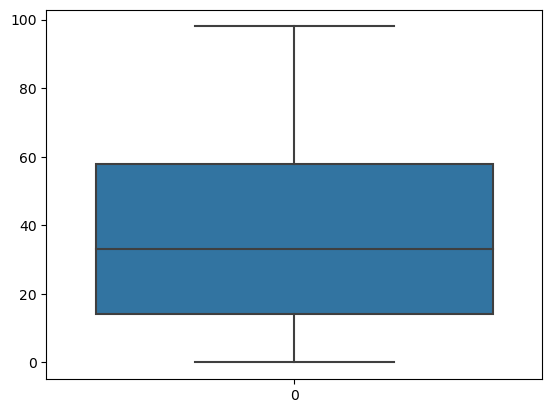

In [15]:
sns.boxplot(data=students.AnnouncementsView)

<AxesSubplot:>

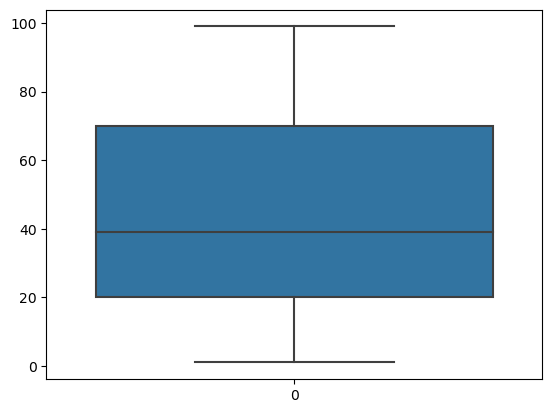

In [16]:
sns.boxplot(data=students.Discussion)

In [15]:
Bank.Tenure_group.value_counts(dropna=False)

Tenure_gt_36    267
Tenure_13_24    266
Tenure_25-36    259
Tenure_7_12     131
Tenure_0_6       58
Name: Tenure_group, dtype: int64

In [16]:
((267+266+259)/981)*100

80.73394495412845

In [17]:
((58+131)/981)*100

19.26605504587156

* 80% of customer required loan tenure for more than a Year

# Data Visualization

#### Bad Rate Analysis 

In [17]:
students.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [18]:
(210/480)*100 # 43.75% is bad rate in data 

43.75

In [19]:
import plotly.express as px

fig = px.pie(students,names='ParentAnsweringSurvey',color='ParentAnsweringSurvey',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Reject customer data  = Bad Customer

In [21]:
students_Yes= students[students["ParentAnsweringSurvey"] == "Yes"]  # 270

students_Yes

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Mum,87,93,63,60,Yes,Good,Under-7,H
470,M,Palestine,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,86,41,Yes,Good,Under-7,M
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M


In [25]:
fig = px.sunburst(students_Yes, path=["gender",'StageID','GradeID',
                                    'Topic','Semester','StudentAbsenceDays'])
fig.show()

In [22]:
students.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [ ]:
(188/480)*100 # 43.75% is bad rate in data 

In [23]:
import plotly.express as px

fig = px.pie(students,names='ParentschoolSatisfaction',color='ParentschoolSatisfaction',
             color_discrete_map={'Good':'red',
                                 'Bad':'green'})
fig.show()

In [24]:
students_Good= students[students["ParentschoolSatisfaction"] == "Good"]  # 292

students_Good

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Mum,87,93,63,60,Yes,Good,Under-7,H
470,M,Palestine,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,86,41,Yes,Good,Under-7,M
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M


In [ ]:
Binary logistics Regression 


Y = will have 2 level


Multi logistics Regression

Y = more than 2 level
As per objective

y = class ( more than 2 level)


In [26]:
fig = px.sunburst(students_Good, path=["gender",'StageID','GradeID',
                                    'Topic','Semester','StudentAbsenceDays'])
fig.show()

### Interpetation : - Trend Analysis
* Customer ==  Male,Graduate,salaried & Tenure  less than a year , Rural   == Loan Rejected 
* customer ==  Male,Graduate,salaried & Tenure  less than a year ,Urban   == Loan Rejected 
* customer ==  Female,Graduate,salaried & Tenure <= 6 Months ,Rural    == Loan Rejected 

# 5. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [27]:
students=students.drop('NationalITy',axis=1)
students.head()

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [28]:
students=students.drop('PlaceofBirth',axis=1)
students.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [30]:
students.select_dtypes(include=[np.number]).columns.tolist()

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [31]:
# Qualitative Variable
Quantitative_Variable = students[students.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [32]:
Qualitative_Variable = students[students.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L


### Converting qualitative Variable into number

In [33]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,1,0,7,0,0,1,1,1,2
1,1,2,1,0,7,0,0,1,1,1,2
2,1,2,1,0,7,0,0,0,0,0,1
3,1,2,1,0,7,0,0,0,0,0,1
4,1,2,1,0,7,0,0,0,0,0,2


## Combining the data set 

In [34]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# Data Partition 

In [35]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [36]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
268,1,1,3,0,3,0,0,1,0,0,10,8,10,10,2
446,1,1,5,0,5,0,1,1,1,1,77,82,74,79,2
44,0,0,6,0,7,0,0,0,0,1,33,33,30,90,2
164,1,2,0,1,4,1,1,1,1,0,55,72,83,14,2
377,1,2,0,1,0,1,1,1,0,0,32,82,59,63,2


# Model building 

# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable

Vs 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

# Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model = output

In [38]:
output.intercept_  # beto 

array([-0.78847764,  0.70596125,  0.08251639])

In [39]:
output.coef_  # Beta 1 -- 

array([[-9.86489035e-01, -1.43919255e+00, -4.09961719e-01,
        -1.26413015e-01,  6.26057008e-03, -1.63017271e-01,
         5.25662601e-01,  4.53796450e-01,  1.57141215e-01,
         7.89593039e-01,  2.76421602e-02,  1.96733381e-02,
         1.70810794e-02,  1.17073219e-02],
       [ 8.71049153e-01,  1.37677011e+00,  4.04325124e-01,
         2.25710675e-01, -7.85324106e-02,  4.29334958e-01,
         5.75001006e-02, -4.08932157e-01, -1.04259925e-01,
        -9.13971115e-01, -3.04530836e-02, -2.72735788e-02,
        -3.49674934e-02, -1.02852000e-02],
       [ 1.15439882e-01,  6.24224428e-02,  5.63659551e-03,
        -9.92976604e-02,  7.22718405e-02, -2.66317687e-01,
        -5.83162701e-01, -4.48642924e-02, -5.28812903e-02,
         1.24378076e-01,  2.81092335e-03,  7.60024075e-03,
         1.78864140e-02, -1.42212194e-03]])

In [40]:
output.feature_names_in_

array(['gender', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
       'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [41]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
268,1,1,3,0,3,0,0,1,0,0,10,8,10,10,2
446,1,1,5,0,5,0,1,1,1,1,77,82,74,79,2
44,0,0,6,0,7,0,0,0,0,1,33,33,30,90,2
164,1,2,0,1,4,1,1,1,1,0,55,72,83,14,2
377,1,2,0,1,0,1,1,1,0,0,32,82,59,63,2


In [42]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
268,1,1,3,0,3,0,0,1,0,0,10,8,10,10,2,1
446,1,1,5,0,5,0,1,1,1,1,77,82,74,79,2,0
44,0,0,6,0,7,0,0,0,0,1,33,33,30,90,2,2
164,1,2,0,1,4,1,1,1,1,0,55,72,83,14,2,2
377,1,2,0,1,0,1,1,1,0,0,32,82,59,63,2,2


train['Probability']= output.predict_proba(X_train)[:,1]
train

train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

# Step 7 : Model Performance Metrics

In [43]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 75,   0,  28],
       [  1,  84,  18],
       [ 38,  13, 127]], dtype=int64)

In [46]:
Accuracy_Train=((75+84+127)/(374)*100)
print(Accuracy_Train)

76.47058823529412


* Accuracy of Model is 76% , So we say Model good fit data  

In [44]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       114
           1       0.82      0.87      0.84        97
           2       0.71      0.73      0.72       173

    accuracy                           0.74       384
   macro avg       0.75      0.75      0.75       384
weighted avg       0.74      0.74      0.74       384



* Accuracy of  Model is 76%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 19% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 99% (Specificity)

# Step 8 : Predictions on Test Dataset

In [47]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
103,1,2,0,1,7,0,0,0,0,0,1,7,6,10,1
134,1,1,4,0,9,1,0,1,1,1,80,80,15,70,0
435,1,1,5,0,2,1,1,1,1,0,79,88,79,20,2
91,1,2,0,1,7,0,0,1,1,1,80,90,55,19,0
246,0,1,3,0,10,1,0,1,1,1,80,94,62,77,0


In [48]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
103,1,2,0,1,7,0,0,0,0,0,1,7,6,10,1,1
134,1,1,4,0,9,1,0,1,1,1,80,80,15,70,0,2
435,1,1,5,0,2,1,1,1,1,0,79,88,79,20,2,2
91,1,2,0,1,7,0,0,1,1,1,80,90,55,19,0,2
246,0,1,3,0,10,1,0,1,1,1,80,94,62,77,0,0


test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [49]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[21  0  6]
 [ 1 25  5]
 [ 6  5 27]]


In [50]:
Accuracy_test=(21+25+27/(96)*100)
Accuracy_test

74.125

In [51]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.81      0.83      0.82        30
           2       0.71      0.71      0.71        38

    accuracy                           0.76        96
   macro avg       0.76      0.76      0.76        96
weighted avg       0.76      0.76      0.76        96



* Accuracy of  Model is 76%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 17% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 99% 

# Coefficient 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [53]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       114
           1       0.82      0.87      0.84        97
           2       0.71      0.73      0.72       173

    accuracy                           0.74       384
   macro avg       0.75      0.75      0.75       384
weighted avg       0.74      0.74      0.74       384



# Finish